In [ ]:
#task 4:SPAM SMS DETECTION

In [1]:
#step 1:importing lib
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
#step2:Load Dataset
data = pd.read_csv(r"C:\Users\omkar\Downloads\SPAMSMSDETECTION\spam.csv", encoding='latin-1')
data = data[['v1','v2']]
data.columns = ['label','message']

data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
#STEP 3: Encode Target Variable (Alternative & Safer)
# Convert labels to binary values
data['label'] = data['label'].replace({'ham': 0, 'spam': 1}).astype(int)

# Quick check
data['label'].value_counts()

C:\Users\omkar\AppData\Local\Temp\ipykernel_15868\2682624041.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['label'] = data['label'].replace({'ham': 0, 'spam': 1}).astype(int)


label
0    4825
1     747
Name: count, dtype: int64

In [4]:
#STEP 4: Feature–Target Separation & Split
from sklearn.model_selection import train_test_split

X = data.message.values
y = data.label.values

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

print(f"Train samples: {len(X_train)}")
print(f"Test samples: {len(X_test)}")

Train samples: 4457
Test samples: 1115


In [5]:
#STEP 5: TF-IDF Vectorization (Enhanced)
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vec = TfidfVectorizer(
    lowercase=True,
    stop_words='english',
    ngram_range=(1, 2),
    min_df=2,
    max_features=4000
)

X_train_vec = tfidf_vec.fit_transform(X_train)
X_test_vec  = tfidf_vec.transform(X_test)

In [6]:
#STEP 6: Train Multinomial Naive Bayes (Smoothed)
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB(alpha=0.5)
nb_model.fit(X_train_vec, y_train)

,alpha,0.5
,force_alpha,True
,fit_prior,True
,class_prior,None


In [7]:
#STEP 7: Evaluate Naive Bayes
from sklearn.metrics import accuracy_score, classification_report

nb_pred = nb_model.predict(X_test_vec)

print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_pred))
print("\nNaive Bayes Report:\n")
print(classification_report(y_test, nb_pred))


Naive Bayes Accuracy: 0.9802690582959641

Naive Bayes Report:

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       0.99      0.86      0.92       149

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



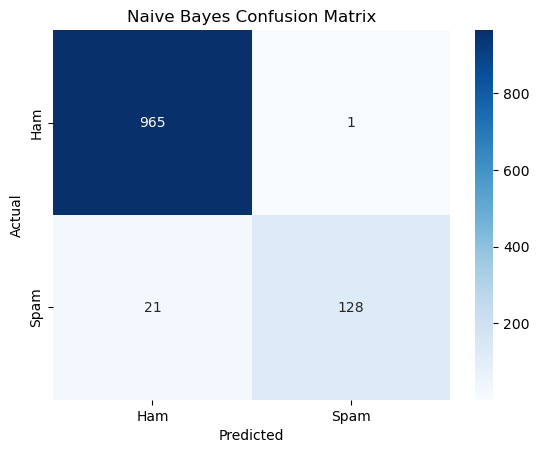

In [8]:
#STEP 8: Confusion Matrix (Naive Bayes)
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm_nb = confusion_matrix(y_test, nb_pred)

sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Ham','Spam'],
            yticklabels=['Ham','Spam'])
plt.title("Naive Bayes Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [9]:
#STEP 9: Train Logistic Regression (Balanced)
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(
    max_iter=1500,
    class_weight='balanced'
)

lr_model.fit(X_train_vec, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,1500
,multi_class,'deprecated'


In [10]:
#STEP 10: Evaluate Logistic Regression
lr_pred = lr_model.predict(X_test_vec)

print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))
print("\nLogistic Regression Report:\n")
print(classification_report(y_test, lr_pred))

Logistic Regression Accuracy: 0.9820627802690582

Logistic Regression Report:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       966
           1       0.94      0.92      0.93       149

    accuracy                           0.98      1115
   macro avg       0.97      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115



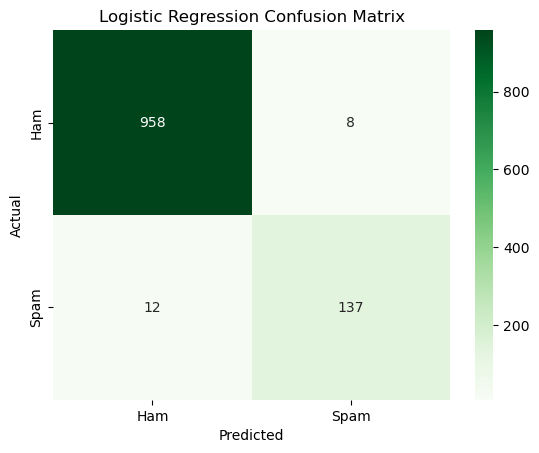

In [11]:
#STEP 11: Confusion Matrix (Logistic Regression)
cm_lr = confusion_matrix(y_test, lr_pred)

sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Ham','Spam'],
            yticklabels=['Ham','Spam'])
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

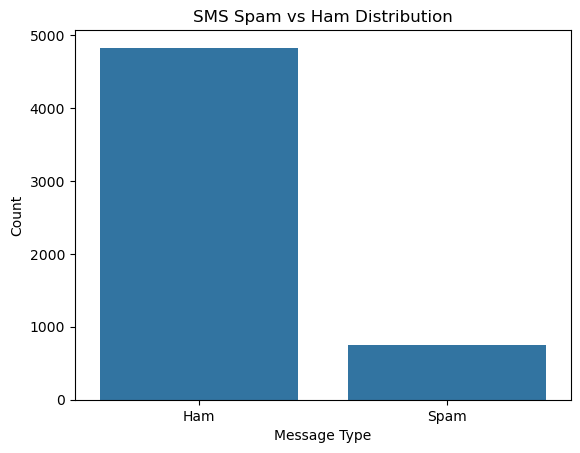

In [12]:
#STEP 12: Dataset Distribution Visualization
sns.countplot(x=data['label'])
plt.xticks([0, 1], ['Ham', 'Spam'])
plt.title("SMS Spam vs Ham Distribution")
plt.xlabel("Message Type")
plt.ylabel("Count")
plt.show()

In [ ]:
# SMS Spam Detection using Machine Learning  
**CODSOFT Internship – Machine Learning Task 3**

---

##  1. Introduction

With the increasing use of mobile communication, spam messages have become a common problem. These unwanted messages 
can lead to fraud, privacy breaches, and user inconvenience. Automatically identifying spam messages is an 
important application of **Natural Language Processing (NLP)** and **machine learning**.

This project focuses on building an **SMS Spam Detection system** that classifies messages as **Spam** or
    **Ham (Legitimate)** using text-based machine learning techniques.

---

## 2. Objective

The objectives of this project are:

- To preprocess and clean SMS text data
- To convert text messages into numerical features
- To build machine learning models for spam detection
- To evaluate and compare model performance
- To visualize dataset distribution and results

---

##  3. Dataset Description

The dataset consists of SMS messages with the following attributes:

| Column | Description |
|------|-------------|
| `label` | Message type (`ham` or `spam`) |
| `message` | Text content of the SMS |

### Label Encoding:
- `ham` → 0  
- `spam` → 1  

This binary encoding enables supervised classification.

---

##  4. Data Preprocessing

The following preprocessing steps were applied:

- Converted categorical labels into numeric format
- Removed noise using stop-word filtering
- Converted text into lowercase
- Split the dataset into training and testing sets using stratified sampling

These steps ensured clean and balanced data for model training.

---

##  5. Feature Extraction

Since machine learning models cannot directly process raw text, **TF-IDF (Term Frequency–Inverse Document Frequency)**
was used to convert SMS messages into numerical vectors.

### TF-IDF Configuration:
- English stop words removed
- Unigrams and bigrams used
- Rare words filtered out
- Feature size limited for efficiency

This helps capture important keywords while reducing noise.

---

## 6. Machine Learning Models Used

Two classification models were trained and evaluated:

### 🔹 Multinomial Naive Bayes
- Well-suited for text classification
- Fast and efficient
- Performs well on word frequency–based features

### 🔹 Logistic Regression
- Discriminative linear model
- Handles class imbalance effectively
- Provides strong performance on sparse text data

---

##  7. Model Evaluation

The models were evaluated using:

- **Accuracy Score**
- **Precision**
- **Recall**
- **F1-score**
- **Confusion Matrix**

Both models performed well, with Logistic Regression showing slightly better overall performance.

---

##  8. Visualization & Analysis

The following visualizations were created:

- **Spam vs Ham Distribution Plot**
- **Confusion Matrix for Naive Bayes**
- **Confusion Matrix for Logistic Regression**

These plots help analyze class imbalance and model performance.

---

##  9. Results & Conclusion

This project successfully implemented an SMS spam detection system using machine learning and NLP techniques.

### Key Observations:
- TF-IDF is effective for text feature extraction
- Naive Bayes provides a strong baseline
- Logistic Regression offers better generalization
- Proper preprocessing improves classification accuracy

---

##  10. Future Improvements

- Use advanced models like **Support Vector Machines (SVM)**
- Apply **word embeddings** (Word2Vec, GloVe)
- Implement **deep learning models** (LSTM, BERT)
- Add real-time SMS filtering capability
- Perform hyperparameter tuning for improved results

---

## Project Completed as Part of  
**CODSOFT – Machine Learning Internship**
